Init Coords
[-1.1517683] [0.43518683]
[1.2036233] [0.3015547]
[-0.40951166] [-0.44973916]
[1.2488182] [-0.46542123]
Step 0: loss_history = 2.3823390007019043
Step 100: loss_history = 0.28263354301452637
Step 200: loss_history = -0.17450208961963654
Step 300: loss_history = -0.507339358329773
Step 400: loss_history = -0.7852174639701843
Step 500: loss_history = -1.0290907621383667
Step 600: loss_history = -1.247900128364563
Step 700: loss_history = -1.446504831314087
Step 800: loss_history = -1.6281274557113647
Step 900: loss_history = -1.7952100038528442
Step 1000: loss_history = -1.949726939201355
Step 1100: loss_history = -2.0933165550231934
Step 1200: loss_history = -2.227349042892456
Step 1300: loss_history = -2.3529751300811768
Step 1400: loss_history = -2.4711642265319824
Step 1500: loss_history = -2.582736015319824
Step 1600: loss_history = -2.688387155532837
Step 1700: loss_history = -2.788712501525879
Step 1800: loss_history = -2.8842241764068604
Step 1900: loss_history = -2.9

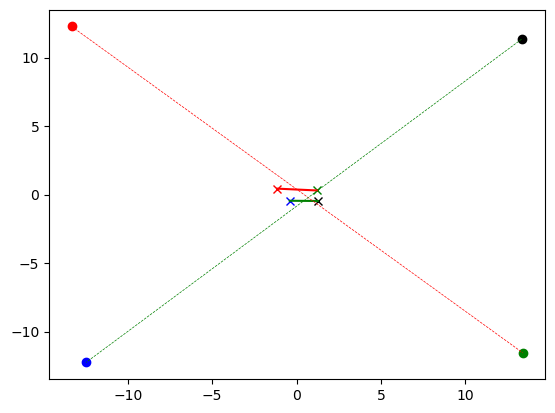

In [1]:
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch import sqrt
import numpy as np

if False:
    x1 = Variable(torch.randn(1)*1, requires_grad=True)
    y1 = Variable(torch.randn(1)*1, requires_grad=True)
    x2 = Variable(torch.randn(1)*1, requires_grad=True)
    y2 = Variable(torch.randn(1)*1, requires_grad=True)

    x3 = Variable(-x1, requires_grad=True)
    y3 = Variable(-y1, requires_grad=True)
    x4 = Variable(-x2, requires_grad=True)
    y4 = Variable(-y2, requires_grad=True)
else:
    x1 = Variable(torch.randn(1)*1, requires_grad=True)
    y1 = Variable(torch.randn(1)*1, requires_grad=True)
    x2 = Variable(torch.randn(1)*1, requires_grad=True)
    y2 = Variable(torch.randn(1)*1, requires_grad=True)
    x3 = Variable(torch.randn(1)*1, requires_grad=True)
    y3 = Variable(torch.randn(1)*1, requires_grad=True)
    x4 = Variable(torch.randn(1)*1, requires_grad=True)
    y4 = Variable(torch.randn(1)*1, requires_grad=True)

plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'x', color='red')
plt.plot(x2.detach().numpy(), y2.detach().numpy(), 'x', color='blue')
plt.plot(x3.detach().numpy(), y3.detach().numpy(), 'x', color='green')
plt.plot(x4.detach().numpy(), y4.detach().numpy(), 'x', color='black')

print("Init Coords")

print(x1.detach().numpy(),y1.detach().numpy())
print(x3.detach().numpy(),y3.detach().numpy())
print(x2.detach().numpy(),y2.detach().numpy())
print(x4.detach().numpy(),y4.detach().numpy())

in_point1 = [x1.detach().numpy(), y1.detach().numpy()]
in_point2 = [x2.detach().numpy(), y2.detach().numpy()]
in_point3 =[x3.detach().numpy(), y3.detach().numpy()]
in_point4 = [x4.detach().numpy(), y4.detach().numpy()]

in_x_values_42 = [in_point4[0], in_point2[0]]
in_y_values_42 = [in_point4[1], in_point2[1]]

in_x_values_43 = [in_point4[0], in_point3[0]]
in_y_values_43 = [in_point4[1], in_point3[1]]

in_x_values_23 = [in_point2[0], in_point3[0]]
in_y_values_23 = [in_point2[1], in_point3[1]]

in_x_values_12 = [in_point1[0], in_point2[0]]
in_y_values_12 = [in_point1[1], in_point2[1]]

in_x_values_13 = [in_point1[0], in_point3[0]]
in_y_values_13 = [in_point1[1], in_point3[1]]

in_x_values_23 = [in_point2[0], in_point3[0]]
in_y_values_23 = [in_point2[1], in_point3[1]]

plt.plot(in_x_values_42, in_y_values_42, color='green')
plt.plot(in_x_values_13, in_y_values_13 ,color='red')



# Define the function he area 
def compute_area(x1, y1, x2, y2, x3, y3, x4, y4):
    # Area = 0.5 * (d1 * d2)
    # where 

    #d1 = ((x1 - x3),(y1 - y3)) 
    #d2 = ((x2 - x4),(y2 - y4))

    #d1 x d2 = (((x1 - x3),(y1 - y3)) x ((x2 - x4),(y2 - y4)))
    #d1 x d2 = ((x1 - x3)*(y2 - y4))-((y1 - y3)*(x2 - x4))
   # d1 x d2 =  x1*y2 -x1*y4 -x3*y2 + x3*y4 -y1*x2 +y1*x4 +y3*x2 -y3*x4

   #  area = 0.5 * |x1*y2 -x1*y4 -x3*y2 + x3*y4 -y1*x2 +y1*x4 +y3*x2 -y3*x4|

    return 0.5*(torch.abs(x1*y2 -x1*y4 -x3*y2 + x3*y4 -y1*x2 +y1*x4 +y3*x2 -y3*x4))
    #(0.5 * ((torch.sqrt((x3 - x1)**2+(y3 - y1)**2)) *(torch.sqrt((x4 - x2)**2+(y4 - y2)**2))))

def compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4):
   
    s1 = torch.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    s2 = torch.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    s3 = torch.sqrt((x4 - x3)**2 + (y4 - y3)**2)
    s4 = torch.sqrt((x1 - x4)**2 + (y1 - y4)**2)
    return s1 + s2 + s3 + s4

# Define the optimizer (we are using stochastic gradient descent)
optimizer = optim.RMSprop([x1, y1, x2, y2, x3, y3, x4, y4], lr=.001, momentum=0)
#Adam
#SGD  momentum=0
#RMSprop

# Number of steps in the optomisation
steps = 15001

# perimeter constraint...limmited to 100 units
max_perimeter = 100

#loss_history = [] #collecting the value of the loss function for each interation 

loss_history = []

# Optimization loop
for step in range(steps):
    # Compute area
    area = compute_area(x1, y1, x2, y2, x3, y3, x4, y4)
    
    # Compute perimeter
    perimeter = compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4)
    
    # apply a penalty if peremter of 100 units is exceeded (not really confindent in this step and the next step)
    perimeter_penalty = (torch.max(torch.tensor(0.), ((perimeter)**2 - (max_perimeter)**2)**1)) #hmmmm
    
    # loss function
    loss = (torch.log(1/area) + perimeter_penalty**1)
    #(torch.log(1/area) + perimeter_penalty**1)  # hmmmm
    #loss = -area + perimeter_penalty**1
    # 2*perimeter_penalty - area
    
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Compute gradients
    loss.backward()
    
    # Update parameters
    optimizer.step()

    loss_history.append(loss.item())

    if step % 100 == 0:
        print(f'Step {step}: loss_history = {loss.item()}') # Prints a value for loss function once every hundred iterations



# optomised coords
optimized_x1 = x1.item()
optimized_y1 = y1.item()
optimized_x2 = x2.item()
optimized_y2 = y2.item()
optimized_x3 = x3.item()
optimized_y3 = y3.item()
optimized_x4 = x4.item()
optimized_y4 = y4.item()


# Print the optimized coords, area and perimeter (should be a square)
print("Optimized Coordinates:")
print("Vertex 1: ({}, {})".format(optimized_x1, optimized_y1))
print("Vertex 2: ({}, {})".format(optimized_x2, optimized_y2))
print("Vertex 3: ({}, {})".format(optimized_x3, optimized_y3))
print("Vertex 4: ({}, {})".format(optimized_x4, optimized_y4))
print("Optimized Perimeter: {:.4f}".format(compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4).item()))
print("Optimized Area: {:.4f}".format(compute_area(x1, y1, x2, y2, x3, y3, x4, y4).item()))
print("Theoretical maximum = 625")



plt.plot(x1.item(), y1.item(), 'o', color='red')
plt.plot(x2.item(), y2.item(), 'o', color='blue')
plt.plot(x3.item(), y3.item(), 'o', color='green')
plt.plot(x4.item(), y4.item(),'o', color='black')

point1 = [x1.item(), y1.item()]
point2 = [x2.item(), y2.item()]
point3 =[x3.item(), y3.item()]
point4 = [x4.item(), y4.item()]


x_values_12 = [point1[0], point2[0]]
y_values_12 = [point1[1], point2[1]]

x_values_13 = [point1[0], point3[0]]
y_values_13 = [point1[1], point3[1]]

x_values_23 = [point2[0], point3[0]]
y_values_23 = [point2[1], point3[1]]


#plt.plot(x_values_13, y_values_13, linestyle="--")
#plt.plot(x_values_12, y_values_12, linestyle="--")
#plt.plot(x_values_23, y_values_23, linestyle="--")


x_values_42 = [point4[0], point2[0]]
y_values_42 = [point4[1], point2[1]]

x_values_43 = [point4[0], point3[0]]
y_values_43 = [point4[1], point3[1]]

x_values_23 = [point2[0], point3[0]]
y_values_23 = [point2[1], point3[1]]


plt.plot(x_values_13, y_values_13, linestyle="--" ,color='red',linewidth=.5)
#plt.plot(x_values_12, y_values_12, linestyle="--" ,color='red')
#plt.plot(x_values_23, y_values_23, linestyle= "--", linewidth = "2" ,color='red')

#plt.plot(x_values_43, y_values_43, linestyle="--", color='green')
plt.plot(x_values_42, y_values_42, linestyle="--", color='green',linewidth=.5)
#plt.plot(x_values_23, y_values_23, linestyle="--" ,color='green')

#plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'o', color='pink')
#plt.plot(x2.detach().numpy(), y2.detach().numpy(), 'o', color='pink')
#plt.plot(x3.detach().numpy(), y3.detach().numpy(), 'o', color='pink')
#plt.plot(x4.detach().numpy(), y4.detach().numpy(),'o', color='pink')



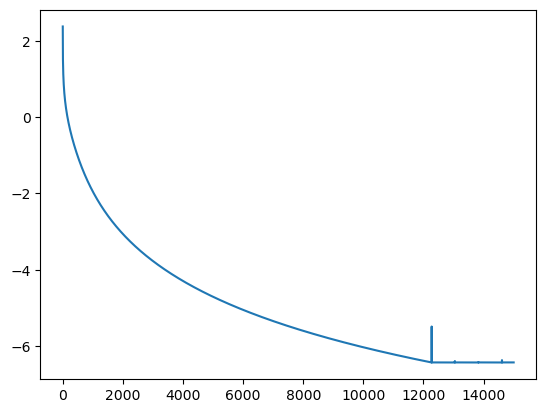

In [2]:
plt.plot(loss_history)
